# **4. EXPLORATORY DATA ANALYSIS**

**BOXPLOTS FOR OUTLIER DETECTION & IQR FOR REMOVAL**

In [1]:
library(tidyverse)
data <- read_csv("social_media_cleaned.csv", na = "NA")

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Rows: 495 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (5): FoMO, Neuroticism, Disinhibition, Openness, SocialMediaAddiction

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


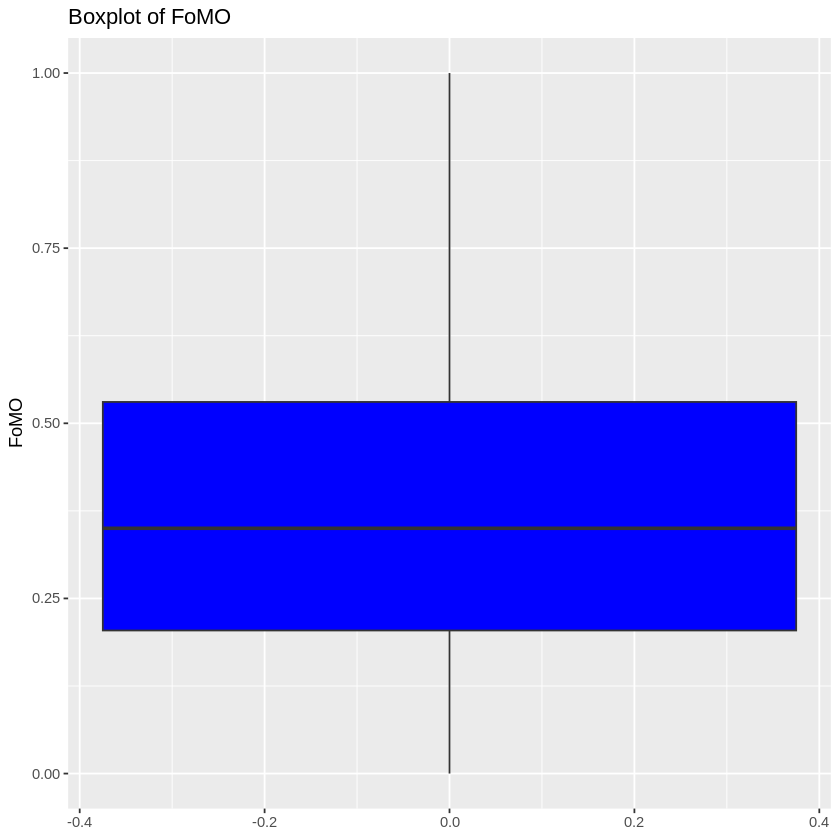

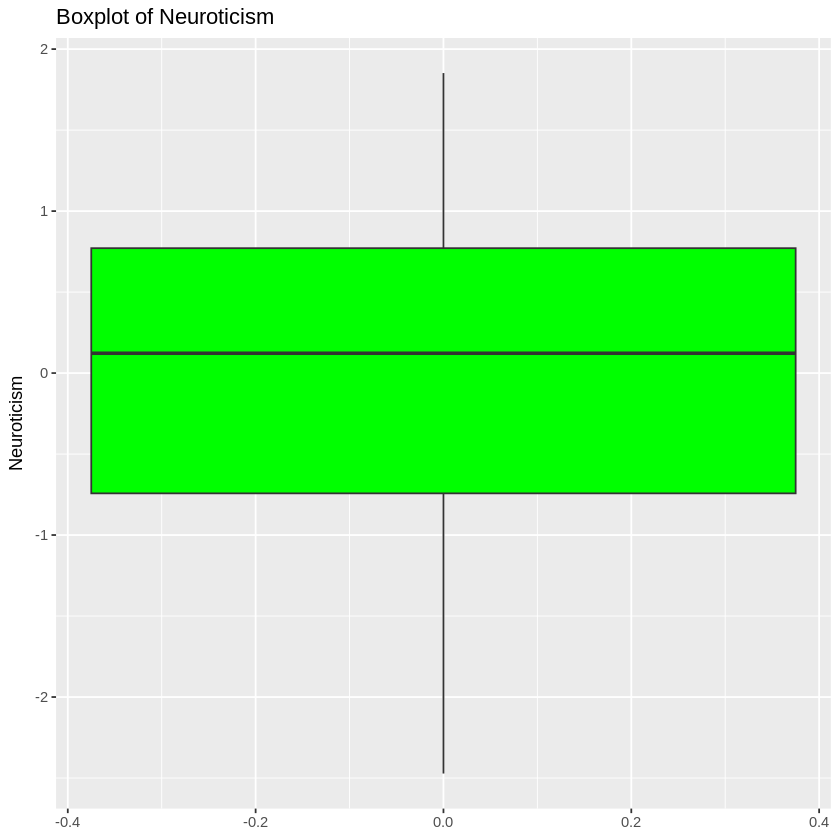

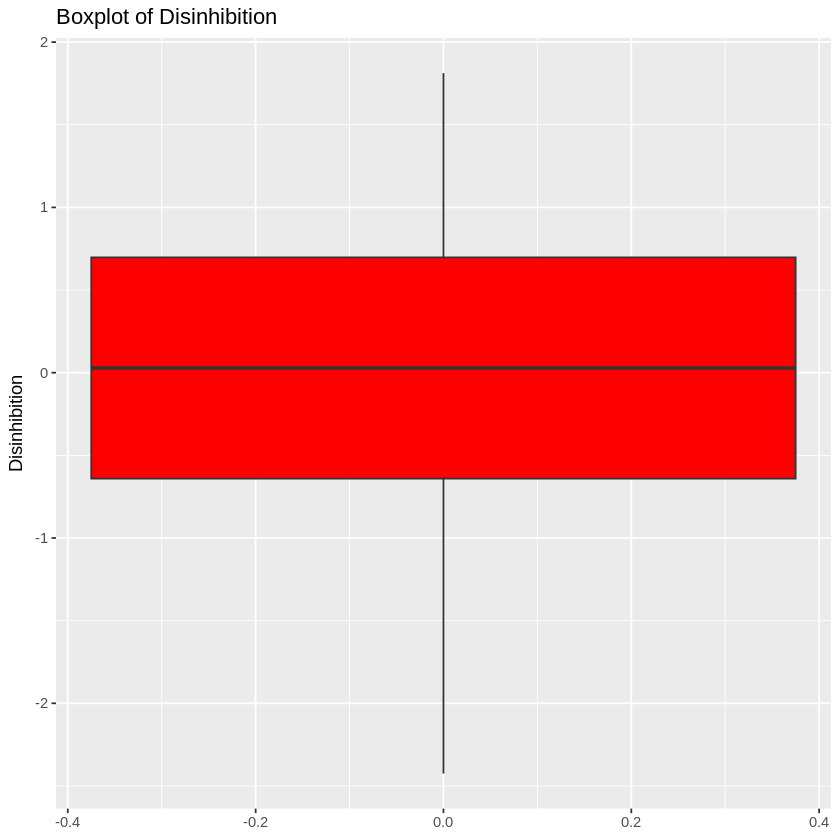

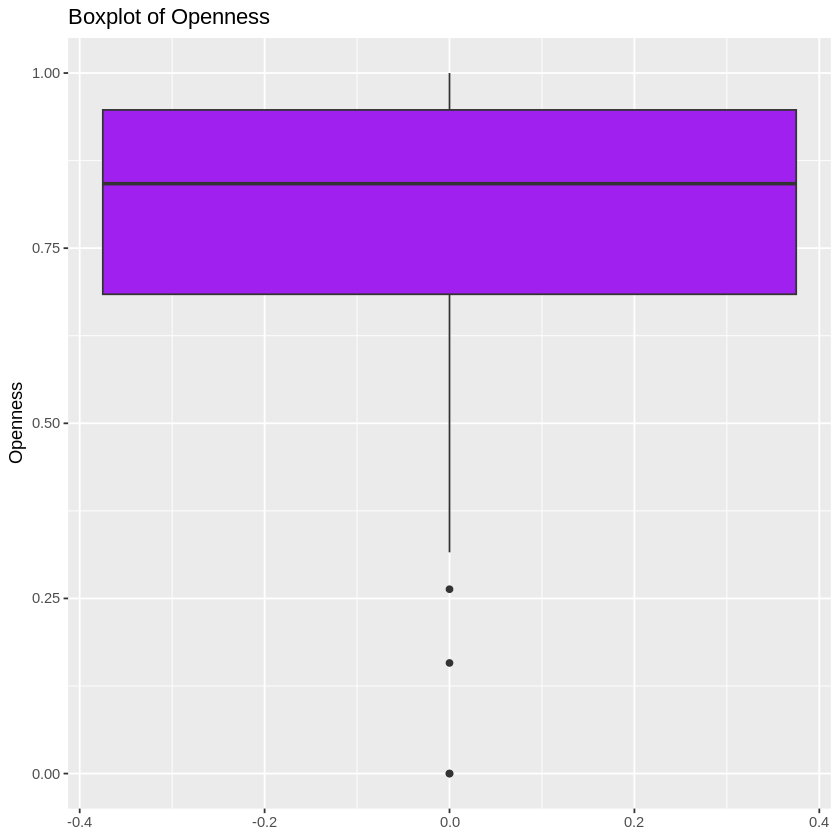

In [2]:
#outlier detection
data <- data %>%
  rowwise() %>%
  filter(all(is.finite(c_across(everything()))))
ggplot(data, aes(y = FoMO)) + geom_boxplot(fill = "blue") + ggtitle("Boxplot of FoMO")
ggplot(data, aes(y = Neuroticism)) + geom_boxplot(fill = "green") + ggtitle("Boxplot of Neuroticism")
ggplot(data, aes(y = Disinhibition)) + geom_boxplot(fill = "red") + ggtitle("Boxplot of Disinhibition")
ggplot(data, aes(y = Openness)) + geom_boxplot(fill = "purple") + ggtitle("Boxplot of Openness")

# Remove outliers using Interquartile Range (IQR)
remove_outliers <- function(x) {
  Q1 <- quantile(x, 0.25, na.rm = TRUE)
  Q3 <- quantile(x, 0.75, na.rm = TRUE)
  IQR_value <- Q3 - Q1
  x[x < (Q1 - 1.5 * IQR_value) | x > (Q3 + 1.5 * IQR_value)] <- NA
  return(x)
}

data <- data %>%
  mutate(across(where(is.numeric), remove_outliers))


**CORRELATION MATRIX**

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

corrplot 0.95 loaded



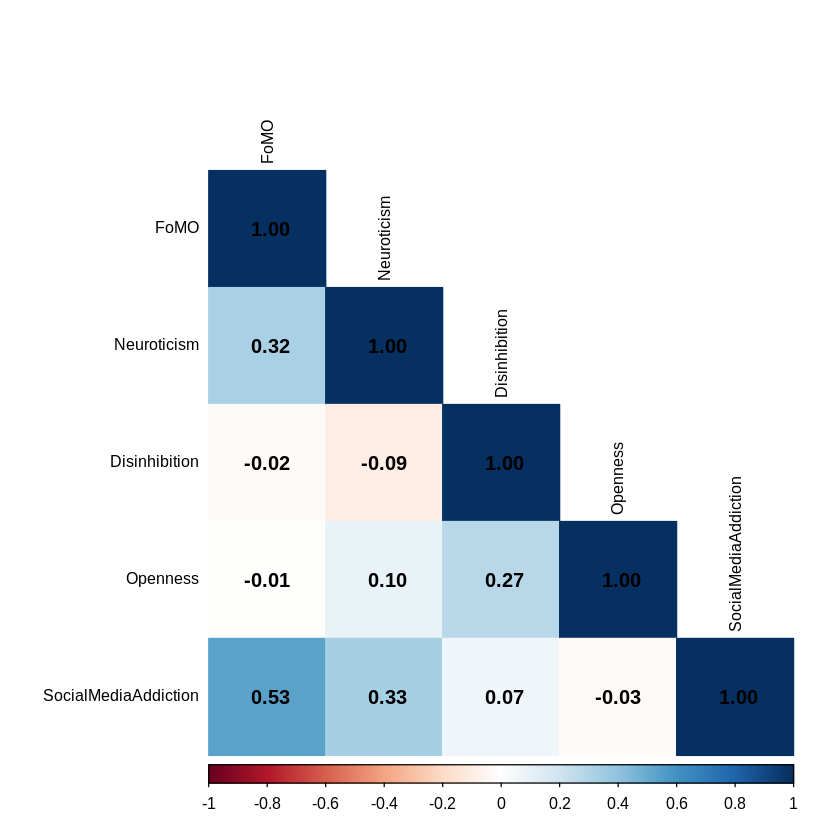

In [3]:
install.packages("corrplot")
library(corrplot)
cor_matrix <- cor(data[, c("FoMO", "Neuroticism", "Disinhibition", "Openness", "SocialMediaAddiction")], use = "complete.obs")
corrplot(cor_matrix, method = "color", type = "lower", addCoef.col = "black", tl.col = "black", tl.cex = 0.8)

* FoMO is the strongest predictor of social media addiction.
* Neuroticism is also an important factor, but less significant than FoMO.
* Disinhibition and Openness do not significantly affect social media addiction in this dataset.
* ML models should prioritize FoMO and Neuroticism as key features when predicting addiction.

**FEATURE RELATIONSHIP**

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


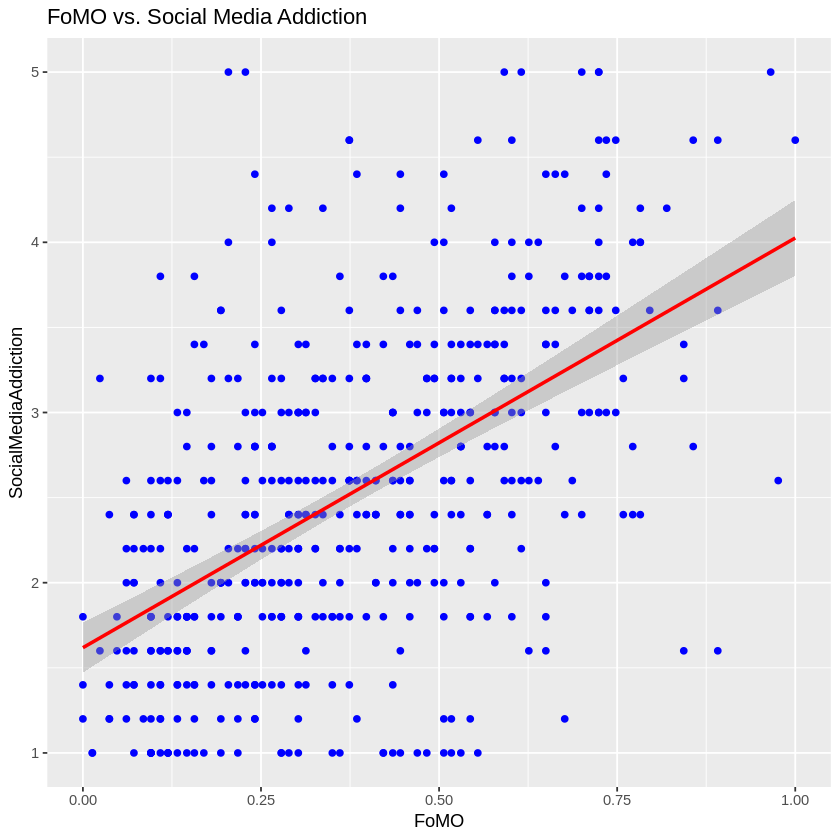

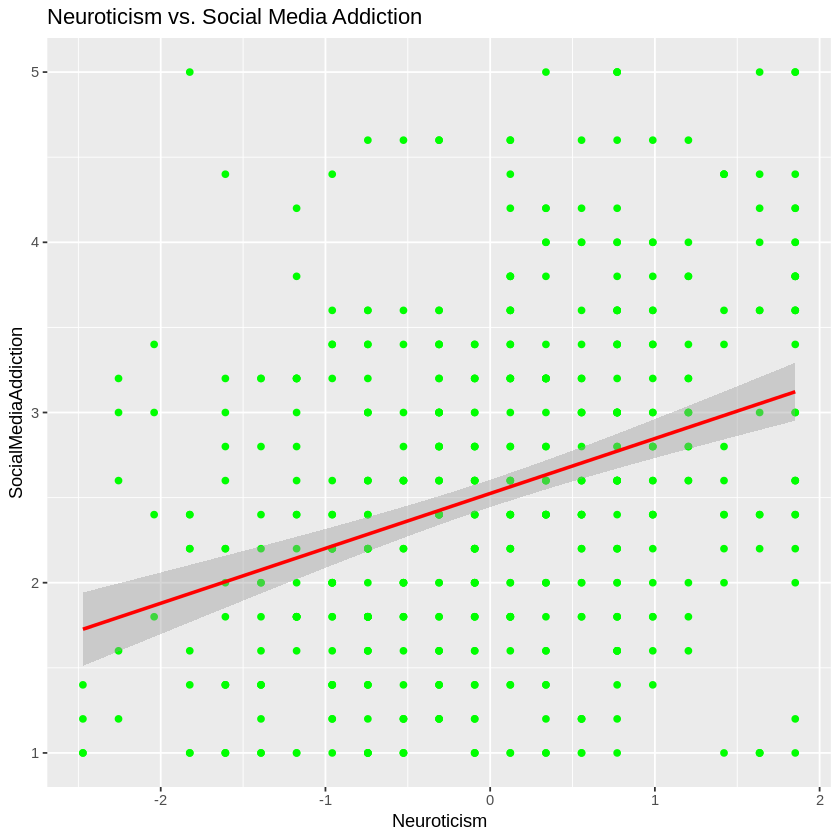

In [4]:
# Scatter plot between FoMO and Social Media Addiction
ggplot(data, aes(x = FoMO, y = SocialMediaAddiction)) +
  geom_point(color = "blue") +
  geom_smooth(method = "lm", color = "red") +
  ggtitle("FoMO vs. Social Media Addiction")

# Scatter plot between Neuroticism and Social Media Addiction
ggplot(data, aes(x = Neuroticism, y = SocialMediaAddiction)) +
  geom_point(color = "green") +
  geom_smooth(method = "lm", color = "red") +
  ggtitle("Neuroticism vs. Social Media Addiction")


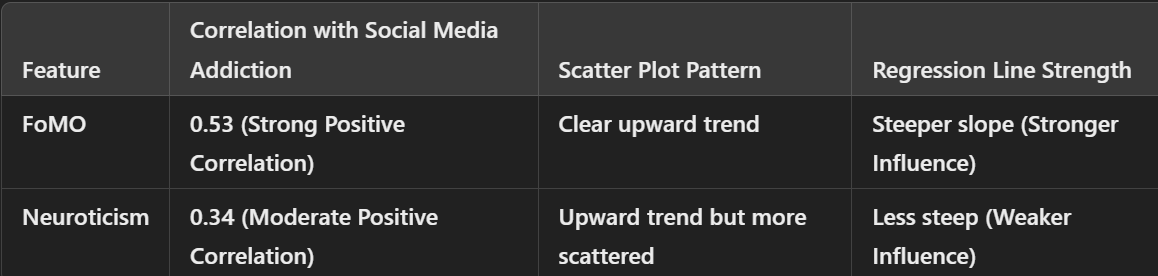

**HYPOTHESIS TESTING**

In [5]:
# T-test to check if high FoMO users have higher social media addiction
t.test(data$SocialMediaAddiction ~ data$FoMO > median(data$FoMO))

# T-test to check if high Neuroticism users have higher Social Media Addiction
t.test(data$SocialMediaAddiction ~ data$Neuroticism > median(data$Neuroticism))


	Welch Two Sample t-test

data:  data$SocialMediaAddiction by data$FoMO > median(data$FoMO)
t = -10.355, df = 476.48, p-value < 2.2e-16
alternative hypothesis: true difference in means between group FALSE and group TRUE is not equal to 0
95 percent confidence interval:
 -0.9760521 -0.6646989
sample estimates:
mean in group FALSE  mean in group TRUE 
           2.118400            2.938776 



	Welch Two Sample t-test

data:  data$SocialMediaAddiction by data$Neuroticism > median(data$Neuroticism)
t = -6.4047, df = 408.72, p-value = 4.147e-10
alternative hypothesis: true difference in means between group FALSE and group TRUE is not equal to 0
95 percent confidence interval:
 -0.7253214 -0.3846424
sample estimates:
mean in group FALSE  mean in group TRUE 
           2.292361            2.847343 


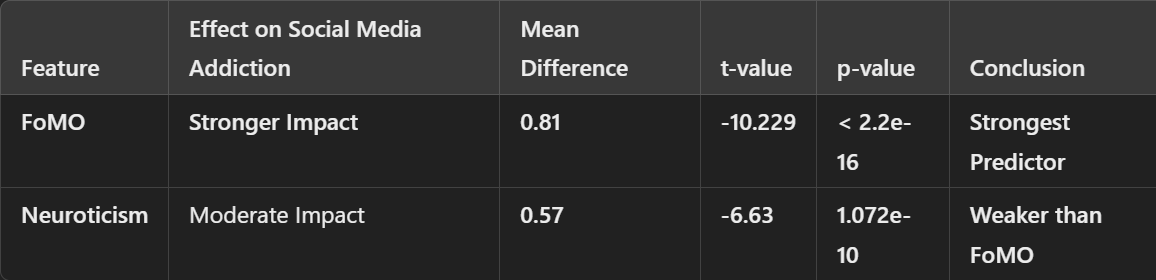

**MULTIVARIATE ANALYSIS**

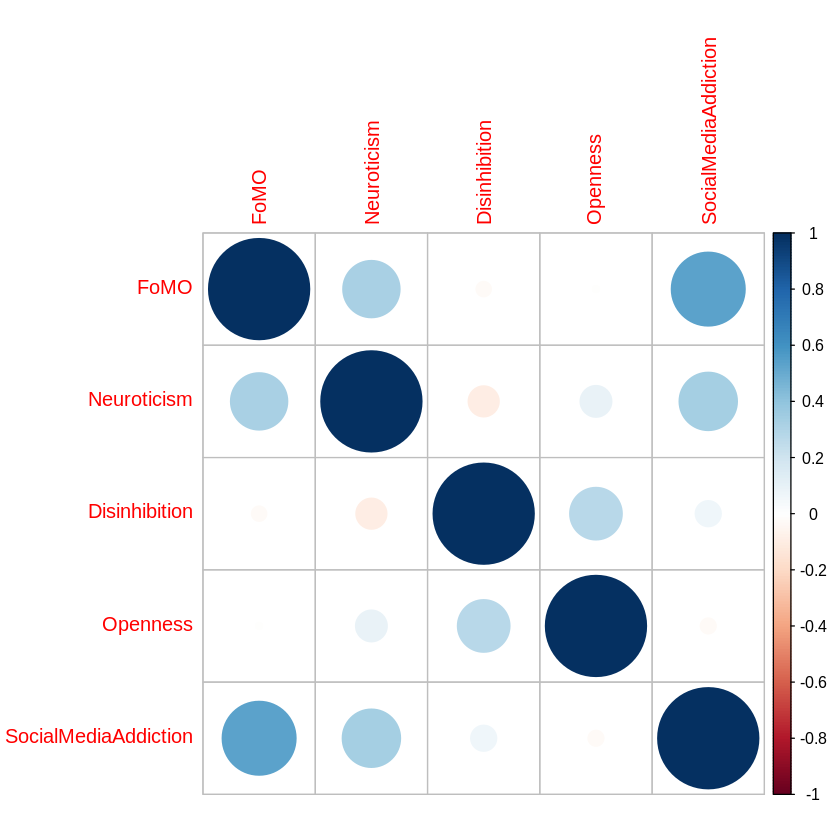

In [6]:
cor_matrix <- cor(data)
corrplot(cor_matrix, method = "circle")

# **5. FEATURE ENGINEERING**

 **Interaction Feature: FoMO × Neuroticism**

In [7]:
data$FoMO_Neuroticism <- data$FoMO * data$Neuroticism
print(head(data$FoMO_Neuroticism,5))

[1]  0.65440254  0.05904715  0.01622174 -1.07877495 -0.68642310


**Feature Transformation: Log Transformation for FoMO**

In [8]:
data$Log_FoMO <- log(data$FoMO + 1)
print(head(data$Log_FoMO,5))

[1] 0.4342253 0.3939043 0.1245388 0.4646845 0.4010344


**Psychological Risk Score for Digital Addiction**

In [9]:
data$DigitalAddictionRisk <- (data$FoMO * 0.5) + (data$Neuroticism * 0.3) + (data$Disinhibition * 0.2)
print(head(data$DigitalAddictionRisk,5))

[1]  0.14792851  0.64060144  0.15329018  0.11115695 -0.03120874


**Binning FoMO into Categories**

In [10]:
data$FoMO_Category <- cut(data$FoMO,
                        breaks = quantile(data$FoMO, probs = seq(0, 1, 0.25)),
                        labels = c("Low", "Medium", "High", "Very High"),
                        include.lowest = TRUE)

In [11]:
write.csv(data, file = "social_media_featured.csv", row.names = FALSE)

**BINNING VISUALIZATION**

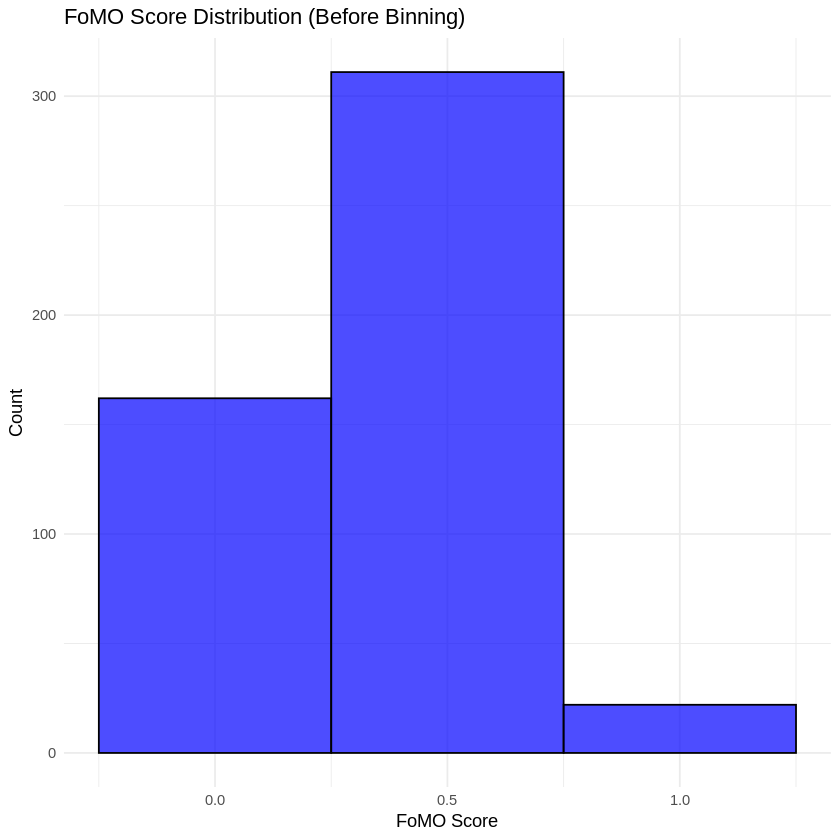

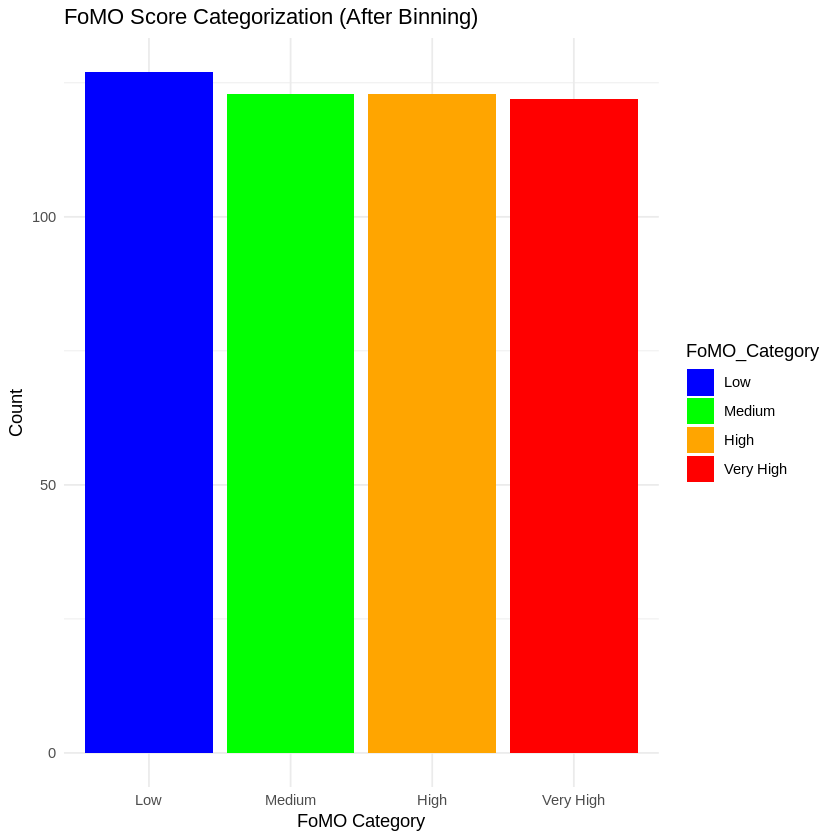

In [12]:
library(ggplot2)
par(mfrow = c(1, 2))  # Create a 1-row, 2-column layout

# Plot 1: Distribution of raw FoMO scores before binning
ggplot(data, aes(x = FoMO)) +
  geom_histogram(binwidth = 0.5, fill = "blue", alpha = 0.7, color = "black") +
  ggtitle("FoMO Score Distribution (Before Binning)") +
  xlab("FoMO Score") +
  ylab("Count") +
  theme_minimal()

# Plot 2: Distribution of FoMO categories after binning
ggplot(data, aes(x = FoMO_Category, fill = FoMO_Category)) +
  geom_bar() +
  scale_fill_manual(values = c("Low" = "blue", "Medium" = "green", "High" = "orange", "Very High" = "red")) +
  ggtitle("FoMO Score Categorization (After Binning)") +
  xlab("FoMO Category") +
  ylab("Count") +
  theme_minimal()

**What it shows:**

* The FoMO scores have been converted into four categories (Low, Medium, High, Very High).
* Ensures that each bin has a balanced distribution for better model learning.

**How it helps:**

* Allows Decision Tree & Random Forest models to capture threshold effects rather than treating FoMO as a continuous variable.
* Ensures a balanced representation across different FoMO levels for fair predictions.
* Helps analyze if social media addiction sharply increases at "High" and "Very High" FoMO levels.

**FEATURE DISTRIBUTION BEFORE MODEL TRAINING**

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



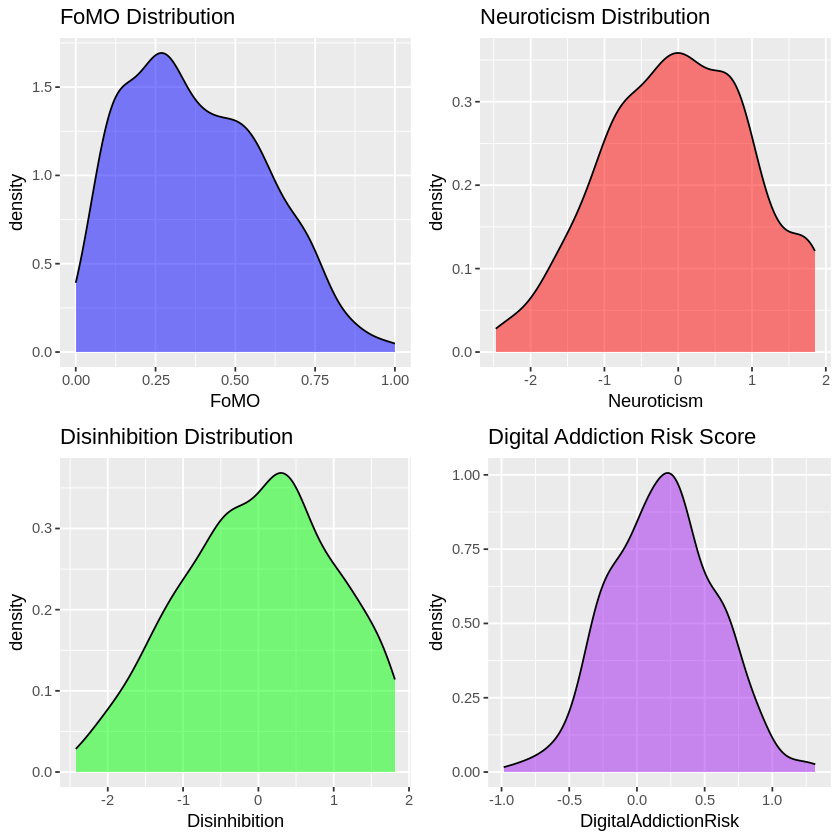

In [16]:
install.packages("gridExtra")
library(ggplot2)
library(gridExtra)

# Density plot for key features
p1 <- ggplot(data, aes(x = FoMO)) + geom_density(fill = "blue", alpha = 0.5) + ggtitle("FoMO Distribution")
p2 <- ggplot(data, aes(x = Neuroticism)) + geom_density(fill = "red", alpha = 0.5) + ggtitle("Neuroticism Distribution")
p3 <- ggplot(data, aes(x = Disinhibition)) + geom_density(fill = "green", alpha = 0.5) + ggtitle("Disinhibition Distribution")
p4 <- ggplot(data, aes(x = DigitalAddictionRisk)) + geom_density(fill = "purple", alpha = 0.5) + ggtitle("Digital Addiction Risk Score")

# Arrange plots
grid.arrange(p1, p2, p3, p4, ncol = 2)

* Ensures data distribution is correct before model training
* Helps detect any remaining outliers or imbalances